### import des bibliothèques

In [1]:
import pandas
pandas.__version__
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### tri du tableau pour obtenir un nouveau tableau avec uniquement les dates, les chiffres et les catégories

In [2]:
# le read_excel prend en argument le chemin qui va le mener vers le fichier voulu
grand_livre = pd.read_excel("Grand livre 2020-2021-test.xlsm")
# pour vérifier qu'on a bien le fichier, afficher les 35 premières lignes
grand_livre.head(35)
categories = grand_livre["Unnamed: 1"]
data = grand_livre[["MON BRICO ETS AH-HOT","Unnamed: 1","Unnamed: 14","Unnamed: 16","Unnamed: 18"]]
data_filtered_2 = data[data["Unnamed: 18"].notna() | categories.notna()]
data_filtered_3 = data_filtered_2[data_filtered_2["MON BRICO ETS AH-HOT"] != "Date"]
data_filtered_4 = data_filtered_3[data_filtered_3["MON BRICO ETS AH-HOT"] != "Total Grand Livre"]

In [3]:
#afficher le tableau après ce premier tri
data_filtered_4

,MON BRICO ETS AH-HOT,Unnamed: 1,Unnamed: 14,Unnamed: 16,Unnamed: 18
17,NaN,1013 CAPITAL,NaN,NaN,NaN
18,01/07/20,NaN,NaN,82322.7,-82322.7
19,NaN,NaN,"0,00","82 322,70","-82 322,70"
20,NaN,1061 RESERVE LEGALE,NaN,NaN,NaN
21,01/07/20,NaN,NaN,8232,-8232
...,...,...,...,...,...
27646,30/04/21,NaN,NaN,2189.4,-22284.58
27647,31/05/21,NaN,NaN,2189.4,-24473.98
27648,30/06/21,NaN,NaN,2189.4,-26663.38
27649,NaN,NaN,"0,00","26 663,38","-26 663,38"


In [6]:
data_filtered_5 = data_filtered_4

In [7]:
for i in data_filtered_5["Unnamed: 1"].index: 
    if pd.isna(data_filtered_4["Unnamed: 1"][i]) :
        data_filtered_5["Unnamed: 1"][i] = data_filtered_5["Unnamed: 1"][i-1]
        
data_filtered_6 = data_filtered_5[data_filtered_5["Unnamed: 18"].notna()]
data_filtered_7 = data_filtered_6[data_filtered_6["MON BRICO ETS AH-HOT"].notna()]

In [9]:
data_filtered_7

,MON BRICO ETS AH-HOT,Unnamed: 1,Unnamed: 14,Unnamed: 16,Unnamed: 18
18,01/07/20,1013 CAPITAL,NaN,82322.7,-82322.7
21,01/07/20,1061 RESERVE LEGALE,NaN,8232,-8232
24,01/07/20,1068 AUTRES RESERVES,NaN,1874389.99,-1874389.99
27,20/11/20,110 Report à nouveau (solde créditeur),NaN,71310.67,-71310.67
30,01/07/20,119 Report à nouveau (solde débiteur),516859.36,NaN,516859.36
...,...,...,...,...,...
27644,28/02/21,79141 AVANTAGE EN NATURE,NaN,2189.4,-17905.78
27645,31/03/21,79141 AVANTAGE EN NATURE,NaN,2189.4,-20095.18
27646,30/04/21,79141 AVANTAGE EN NATURE,NaN,2189.4,-22284.58
27647,31/05/21,79141 AVANTAGE EN NATURE,NaN,2189.4,-24473.98


### création du nouvel excel 

In [10]:
# créer au préalable un fichier excel 
file_name = 'QR_pandas_VF.xlsx'

In [11]:
data_filtered_7.to_excel(file_name)
print('Sales record successfully exported into Excel File')

Sales record successfully exported into Excel File


In [ ]:
# dans ce nouvel excel :
# renommer les colonnes
# les dates doivent être converties en Date et les catégories en Texte
# corriger les erreurs sur les dates si il y en a 
# raccourci clavier : pour sélectionner une colonne entière command+Maj+Down

### tracer un graphe

In [12]:
excel_pandas = pd.read_excel("QR_pandas_VF.xlsx")

In [13]:
excel_pandas

,date,categorie,debit,credit,solde progressif
0,2020-07-01,1013 CAPITAL,NaN,82322.70,-82322.70
1,2020-07-01,1061 RESERVE LEGALE,NaN,8232.00,-8232.00
2,2020-07-01,1068 AUTRES RESERVES,NaN,1874389.99,-1874389.99
3,2020-11-20,110 Report à nouveau (solde créditeur),NaN,71310.67,-71310.67
4,2020-07-01,119 Report à nouveau (solde débiteur),516859.36,NaN,516859.36
...,...,...,...,...,...
18589,2021-02-28,79141 AVANTAGE EN NATURE,NaN,2189.40,-17905.78
18590,2021-03-31,79141 AVANTAGE EN NATURE,NaN,2189.40,-20095.18
18591,2021-04-30,79141 AVANTAGE EN NATURE,NaN,2189.40,-22284.58
18592,2021-05-31,79141 AVANTAGE EN NATURE,NaN,2189.40,-24473.98


In [14]:
plt_av = excel_pandas[excel_pandas["categorie"] == "79141  AVANTAGE EN NATURE"]

<AxesSubplot:xlabel='date', ylabel='solde progressif'>

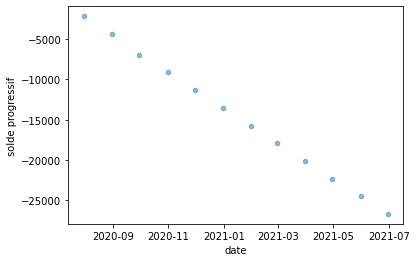

In [15]:
plt_av.plot.scatter(x="date", y="solde progressif", alpha=0.5)